# Introduction to Pandas

Pandas is a high level fata manipulation package which was built on top of Numpy. The key structures within pandas include Series and Dataframes


## Series

A series is a one-dimensional array with axis labels. A series is a ndarray, thus it is homogeneous and cannot store multiple dtypes.

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [5]:
x = pd.Series([10,20,30,40,50])
x

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [6]:
x.index

RangeIndex(start=0, stop=5, step=1)

In [7]:
x.values

array([10, 20, 30, 40, 50])

In [8]:
x.dtype

dtype('int64')

In [11]:
# Creating series with an index

data = [450, 650, 870]
sales = Series(data, index=["Don", "Mike", "Edwin"])

In [12]:
sales

Don      450
Mike     650
Edwin    870
dtype: int64

In [13]:
type(sales)

pandas.core.series.Series

In [14]:
sales.index

Index(['Don', 'Mike', 'Edwin'], dtype='object')

## Accessing Values

In [17]:
sales["Don"]

np.int64(450)

In [18]:
sales[0]

C:\Users\vidus\AppData\Local\Temp\ipykernel_20412\1101347017.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sales[0]


np.int64(450)

In [20]:
sales.iloc[0]

np.int64(450)

## Checking for conditions

In [21]:
sales > 500

Don      False
Mike      True
Edwin     True
dtype: bool

In [22]:
sales[[False, True, True]]

Mike     650
Edwin    870
dtype: int64

In [23]:
sales[sales>500]

Mike     650
Edwin    870
dtype: int64

In [25]:
"Sally" in sales

False

In [27]:
450 in sales
# 450 is not an index, it is a value. Hence this ouputs False

False

### Working with Dictionaries

In [29]:
# Converting series to dictionary

sales_dict = sales.to_dict()

In [30]:
sales_dict

{'Don': 450, 'Mike': 650, 'Edwin': 870}

In [31]:
# Converting dictionary to series
sales_ser = Series(sales_dict)
sales_ser

Don      450
Mike     650
Edwin    870
dtype: int64

### Adding enties and working with NaN/null values

In [35]:
# If indesx doesn't already have value, it is set to NaN by default
new_sales = Series(sales, index=["Don", "Mike", "Sally", "Edwin", "Lucy"])

In [36]:
new_sales

Don      450.0
Mike     650.0
Sally      NaN
Edwin    870.0
Lucy       NaN
dtype: float64

In [37]:
np.isnan(new_sales)

Don      False
Mike     False
Sally     True
Edwin    False
Lucy      True
dtype: bool

In [38]:
# To check for null values use pandas
pd.isnull(new_sales)

Don      False
Mike     False
Sally     True
Edwin    False
Lucy      True
dtype: bool

### Naming Components in a Series

In [40]:
sales.index.name = "Sales Person"

In [41]:
sales

Sales Person
Don      450
Mike     650
Edwin    870
dtype: int64

In [42]:
# NMaming a series
sales.name = "Total Sales"
sales

Sales Person
Don      450
Mike     650
Edwin    870
Name: Total Sales, dtype: int64

## DataFrames

DataFrames are two-dimensional, size-mutable, potentially heterogeneous tabular data structures. This data structure contains TWO labeled axes (row and column)

### Creating a DataFrame

In [44]:
# From list
data = [["Adrian", 20], ["Bethany", 23], ["Chloe", 41]]

df = pd.DataFrame(data, columns=["Name", "Age"])

In [45]:
df

,Name,Age
0,Adrian,20
1,Bethany,23
2,Chloe,41


### Pandas DataFrame Research Task

#### Creating a DataFrame from a dictionary

In [60]:
data_dict = {"row1" : ["Adrian", 20], "row2" : ["Bethany", 23], "row3": ["Chloe", 41]}

In [61]:
# orient arguement in the from_dict function can be used to set dictionary keys as rows or columns
# columns arguement can be used to set custom columns

df_dict = pd.DataFrame.from_dict(data_dict, orient="index", columns=["Person", "Number"])

In [62]:
df_dict

,Person,Number
row1,Adrian,20
row2,Bethany,23
row3,Chloe,41


#### Creating a DataFrame from a list of dictionaries

In [52]:
# pd.DataFrame(dict_list) can also be used
data_dict_list = [{'Person': 'Adrian', 'Age': 20}, 
        {'Person': "Bethany", 'Age': 23}]

df_list_dict = pd.DataFrame.from_records(data_dict_list)

In [65]:
df_list_dict

,Person,Age
0,Adrian,20
1,Bethany,23


#### Creating DataFrame from a Series

In [2]:
person_list = ["A", "B", "C"]
age_list = [20, 23, 21]

person_series = pd.Series(person_list)
age_series = pd.Series(age_list)

In [3]:
# To convert series to dataframe, it must be added to a disctiory and then converted to dataframe
column_dict = {"Person" : person_series, "Age" : age_series}
series_df = pd.DataFrame(column_dict)

In [4]:
series_df

,Person,Age
0,A,20
1,B,23
2,C,21


#### Adding a series to existing DataFrame

In [6]:
city_list = ["London", "New York", "London"]
city_series = pd.Series(city_list)

In [7]:
series_df['City'] = city_series

In [8]:
series_df

,Person,Age,City
0,A,20,London
1,B,23,New York
2,C,21,London


#### Changing index of a DataFrame

In [53]:
# set_index() can be used to change index of a DataFrame
# inplace arguement needs to be set true for change to be permenant
# reindex() method can also be used

series_df.set_index('Person')

NameError: name 'series_df' is not defined

#### Filling missing values


fillna() function can be used to fill missing values

In [ ]:
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", np.nan],
    "Age": [25, np.nan, 30, 35, 40],
    "City": ["New York", "Los Angeles", np.nan, "Chicago", "Houston"],
    "Salary": [50000, 60000, 70000, np.nan, 90000],
}

df = pd.DataFrame(data)

In [11]:
df.fillna("NaN Filler")

,Name,Age,City,Salary
0,Alice,25.0,New York,50000.0
1,Bob,NaN Filler,Los Angeles,60000.0
2,Charlie,30.0,NaN Filler,70000.0
3,David,35.0,Chicago,NaN Filler
4,NaN Filler,40.0,Houston,90000.0


method arguement can be given the value pad or bfill to perform a forward fill or backward fill. Forward fill fills the missing value with a previous value and backward fill fills the missing value with the next value. <br>
Note: This is an old method and is ideal to use seperate functions called ffill() and bfill() for these operations.

In [12]:
df.fillna(method='pad')

C:\Users\vidus\AppData\Local\Temp\ipykernel_31956\196241153.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='pad')


,Name,Age,City,Salary
0,Alice,25.0,New York,50000.0
1,Bob,25.0,Los Angeles,60000.0
2,Charlie,30.0,Los Angeles,70000.0
3,David,35.0,Chicago,70000.0
4,David,40.0,Houston,90000.0


In [13]:
df.ffill()

,Name,Age,City,Salary
0,Alice,25.0,New York,50000.0
1,Bob,25.0,Los Angeles,60000.0
2,Charlie,30.0,Los Angeles,70000.0
3,David,35.0,Chicago,70000.0
4,David,40.0,Houston,90000.0


#### Interpolate Function

#### Drop Values

drop() function can be used to drop columns or indexes from a DataFrame

| Operation | Function and Parameters |
| --------- | ----------------------- |
| Drop Rows | ```df.drop(index, axis=0)``` |
| Drop Columns | ```df.drop(columns, axis=1)``` |
| Drop rows/columns with NaN | ```df.dropna(axis=0/1)``` |
| Drop based on threshold | ```df.dropna(thresh=n)``` |
| Drop specific rows by index | ```df.drop([index1, index2], axis=0)``` |
| Drop specific columns | ```df.drop([column name], axis=1)``` |

In [2]:
drop_data = {
    "Name": ["Alice", "Bob", "Charlie", "David"],
    "Age": [25, 30, 35, 40],
    "City": ["New York", "Los Angeles", "Chicago", "Houston"]
}

In [6]:
df_drop = pd.DataFrame(drop_data)
df_drop

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago
3,David,40,Houston


In [4]:
column_drop = df_drop.drop('City', axis = 1)

In [5]:
column_drop

,Name,Age
0,Alice,25
1,Bob,30
2,Charlie,35
3,David,40


In [10]:
data_missing = {
    "Name": ["Alice", "Bob", "Charlie", "David", np.nan],
    "Age": [25, np.nan, 30, 35, 40],
    "City": ["New York", "Los Angeles", np.nan, "Chicago", "Houston"],
    "Salary": [50000, 60000, np.nan, np.nan, 90000],
}

missing_df = pd.DataFrame(data_missing)
missing_df

,Name,Age,City,Salary
0,Alice,25.0,New York,50000.0
1,Bob,NaN,Los Angeles,60000.0
2,Charlie,30.0,NaN,NaN
3,David,35.0,Chicago,NaN
4,NaN,40.0,Houston,90000.0


In [11]:
drop_missing = missing_df.dropna()
drop_missing

,Name,Age,City,Salary
0,Alice,25.0,New York,50000.0


In [12]:
# thresh parameter says ho many no NaN values the row must contain for it to be not dropped
drop_thresh = missing_df.dropna(thresh=3)
drop_thresh

,Name,Age,City,Salary
0,Alice,25.0,New York,50000.0
1,Bob,NaN,Los Angeles,60000.0
3,David,35.0,Chicago,NaN
4,NaN,40.0,Houston,90000.0


In [14]:
drop_index = df_drop.drop([0,2], axis=0)
drop_index

,Name,Age,City
1,Bob,30,Los Angeles
3,David,40,Houston


#### Remove Duplicates

In [16]:
data_duplicates = {
    "Name": ["Alice", "Bob", "Alice", "David", "Bob"],
    "Age": [25, 30, 25, 40, 30],
    "City": ["New York", "Los Angeles", "New York", "Houston", "Los Angeles"]
}
df_duplicates = pd.DataFrame(data_duplicates)
df_duplicates

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Alice,25,New York
3,David,40,Houston
4,Bob,30,Los Angeles


In [18]:
drop_duplicates = df_duplicates.drop_duplicates()
drop_duplicates

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
3,David,40,Houston


#### Select Values in a DataFrame

In [19]:
# There are multiple ways to select items in a DataFrame
# to select specific columns bracket notation or dot notation can be used

data_select = {
    "Name": ["Alice", "Bob", "Charlie", "David"],
    "Age": [25, 30, 35, 40],
    "City": ["New York", "Los Angeles", "Chicago", "Houston"]
}

df_select = pd.DataFrame(data_select)

In [20]:
column_select_1 = df_select['Name']
column_select_1

0      Alice
1        Bob
2    Charlie
3      David
Name: Name, dtype: object

In [21]:
column_select_2 = df_select.Name
column_select_2

0      Alice
1        Bob
2    Charlie
3      David
Name: Name, dtype: object

In [23]:
# Multiple columns can be selected, result would be a dataframe whereas when single column is selected result is a series
multi_column_select = df_select[['Name', 'City']]
multi_column_select

,Name,City
0,Alice,New York
1,Bob,Los Angeles
2,Charlie,Chicago
3,David,Houston


In [26]:
# Columns can also be selected using loc and iloc functions.
# iloc uses index to locate the column

loc_select = df_select.loc[:, 'Age']
loc_select

0    25
1    30
2    35
3    40
Name: Age, dtype: int64

In [29]:
# index 1 to select second column which is age
iloc_select = df_select.iloc[:, 1]
iloc_select

0    25
1    30
2    35
3    40
Name: Age, dtype: int64

In [31]:
# Specific values can be specifying rows and columns
loc_select_specific = df_select.loc[1, 'Name']
loc_select_specific

'Bob'

#### Sorting Values

In [33]:
# Data Alignment
# sort_values() method can be used to sort dataframe by values

data_sort = {
    "Name": ["Alice", "Bob", "Charlie", "David"],
    "Age": [25, 30, 35, 40],
    "Salary": [50000, 70000, 60000, 80000]
}

df_sort = pd.DataFrame(data_sort)
df_sort

,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,70000
2,Charlie,35,60000
3,David,40,80000


In [35]:
# sort_values() has parameter ascending which is set to true by default. This can be set to false for descending order.
salary_sort = df_sort.sort_values('Salary')
salary_sort

,Name,Age,Salary
0,Alice,25,50000
2,Charlie,35,60000
1,Bob,30,70000
3,David,40,80000


In [37]:
# sorting can be done by multiple values
# In this case dataframe will be sorted by first value first and then the second value

multi_sort = df_sort.sort_values(['Salary', 'Age'])
multi_sort

,Name,Age,Salary
0,Alice,25,50000
2,Charlie,35,60000
1,Bob,30,70000
3,David,40,80000


In [38]:
# DataFrames can also be sorted by index

index_sort = multi_sort.sort_index()
index_sort

,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,70000
2,Charlie,35,60000
3,David,40,80000


#### Ranking in DataFrane

In [40]:
#rank() can be used to assign ranks in a database
data_rank = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve", "Frank"],
    "Score": [90, 80, 90, 70, 80, 60]  
}

df_rank = pd.DataFrame(data_rank)
df_rank

,Name,Score
0,Alice,90
1,Bob,80
2,Charlie,90
3,David,70
4,Eve,80
5,Frank,60


In [49]:
# 90 is ranked 1st and 2nd, avg (1+2)/2 = 1.5
# 80 is ranked 3rd and 4th, avg (3+4)/2 = 3.5
df_rank["Rank_Average"] = df_rank["Score"].rank(method="average", ascending=False)
df_rank
df_rank.drop('Rank_Min', axis=1)

,Name,Score,Rank_Average
0,Alice,90,1.5
1,Bob,80,3.5
2,Charlie,90,1.5
3,David,70,5.0
4,Eve,80,3.5
5,Frank,60,6.0


In [50]:
df_rank["Rank_Min"] = df_rank["Score"].rank(method="min", ascending=False)
df_rank

,Name,Score,Rank_Average,Rank_Min
0,Alice,90,1.5,1.0
1,Bob,80,3.5,3.0
2,Charlie,90,1.5,1.0
3,David,70,5.0,5.0
4,Eve,80,3.5,3.0
5,Frank,60,6.0,6.0


In [51]:
# When first method is used, ranks are assigned in the order the data appears
df_rank["Rank_First"] = df_rank["Score"].rank(method="first", ascending=False)
df_rank

,Name,Score,Rank_Average,Rank_Min,Rank_First
0,Alice,90,1.5,1.0,1.0
1,Bob,80,3.5,3.0,3.0
2,Charlie,90,1.5,1.0,2.0
3,David,70,5.0,5.0,5.0
4,Eve,80,3.5,3.0,4.0
5,Frank,60,6.0,6.0,6.0


## Data Handling and Visualisation

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
iris = sb.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
spec = iris.groupby('species')
spec.describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [10]:
spec.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [14]:
iris2 = iris.set_index('species')
iris2

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
...,...,...,...,...
virginica,6.7,3.0,5.2,2.3
virginica,6.3,2.5,5.0,1.9
virginica,6.5,3.0,5.2,2.0


In [19]:
setosa_df = iris[iris.species == 'setosa']
versicolor_df = iris[iris.species == 'versicolor']
virginica_df = iris[iris.species == 'virginica']

In [26]:
sepal_df = iris.loc[:, ['sepal_length', 'sepal_width', 'species']]
sepal_df
# setosa_df = spec.get_group('setosa')

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa
...,...,...,...
145,6.7,3.0,virginica
146,6.3,2.5,virginica
147,6.5,3.0,virginica
148,6.2,3.4,virginica


In [27]:
petal_df = iris.loc[:, ['petal_length', 'petal_width', 'species']]
petal_df

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


In [28]:
# Concat or merge can be used to combine above dataframes to form the iris dataframe

In [32]:
flights = sb.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [35]:
flights_piv = flights.pivot(index='year', columns='month', values='passengers')
flights_piv.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


In [36]:
stack = flights_piv.stack()
stack

year  month
1949  Jan      112
      Feb      118
      Mar      132
      Apr      129
      May      121
              ... 
1960  Aug      606
      Sep      508
      Oct      461
      Nov      390
      Dec      432
Length: 144, dtype: int64

In [37]:
titanic_data = sb.load_dataset('titanic')
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:

class_data = titanic_data.groupby('class')
class_data['fare'].mean()

C:\Users\vidus\AppData\Local\Temp\ipykernel_28068\1149298464.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_data = titanic_data.groupby('class')


class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

In [42]:
class_data['age'].mean()

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

In [45]:
total_fare = titanic_data['fare'].sum()
titanic_data['percentage_of_total_fare'] = (titanic_data['fare']/total_fare) * 100
total_fare

np.float64(28693.9493)

In [44]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,percentage_of_total_fare
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.025267
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.248426
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.027619
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.185056
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.028055


In [46]:
survivor_count = titanic_data[titanic_data["survived"] == 1]["sex"].value_counts()
survivor_count

sex
female    233
male      109
Name: count, dtype: int64

In [47]:
fmri = sb.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


Text(0.5, 0, 'Timepoint')

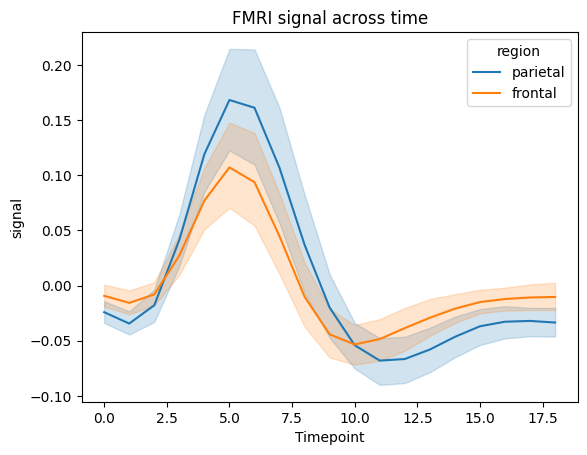

In [50]:
sb.lineplot(x='timepoint', y='signal', data=fmri, hue='region')
plt.title('FMRI signal across time')
plt.xlabel('Timepoint')

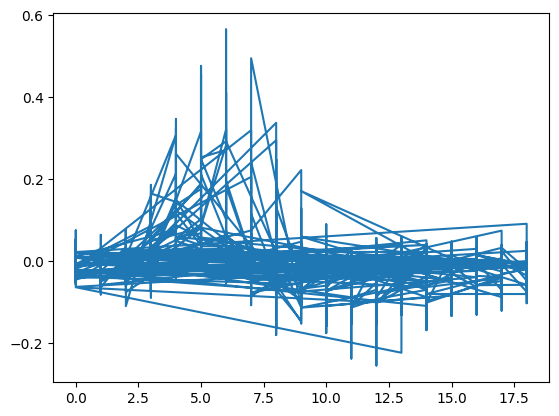

In [51]:
plt.plot(fmri.timepoint, fmri.signal)

In [52]:
tips = sb.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='day', ylabel='total_bill'>

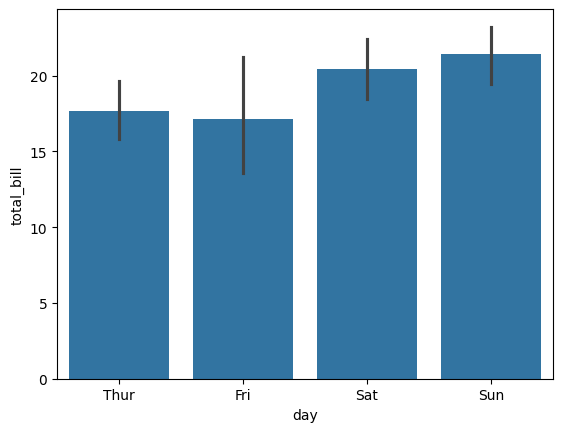

In [56]:
sb.barplot(x='day', y='total_bill', data=tips)

<BarContainer object of 244 artists>

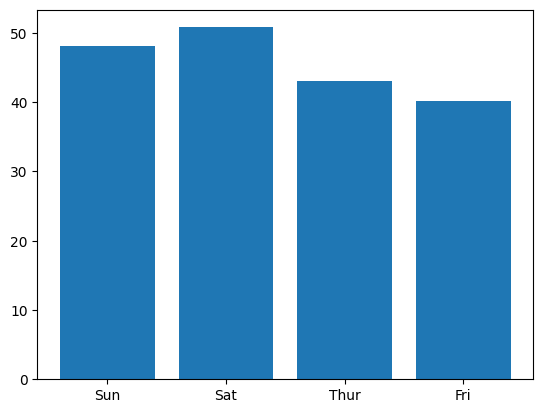

In [55]:
plt.bar(tips.day, tips.total_bill)

In [58]:
tips.groupby('day')['total_bill'].max()

C:\Users\vidus\AppData\Local\Temp\ipykernel_28068\2295691316.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')['total_bill'].max()


day
Thur    43.11
Fri     40.17
Sat     50.81
Sun     48.17
Name: total_bill, dtype: float64

In [59]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


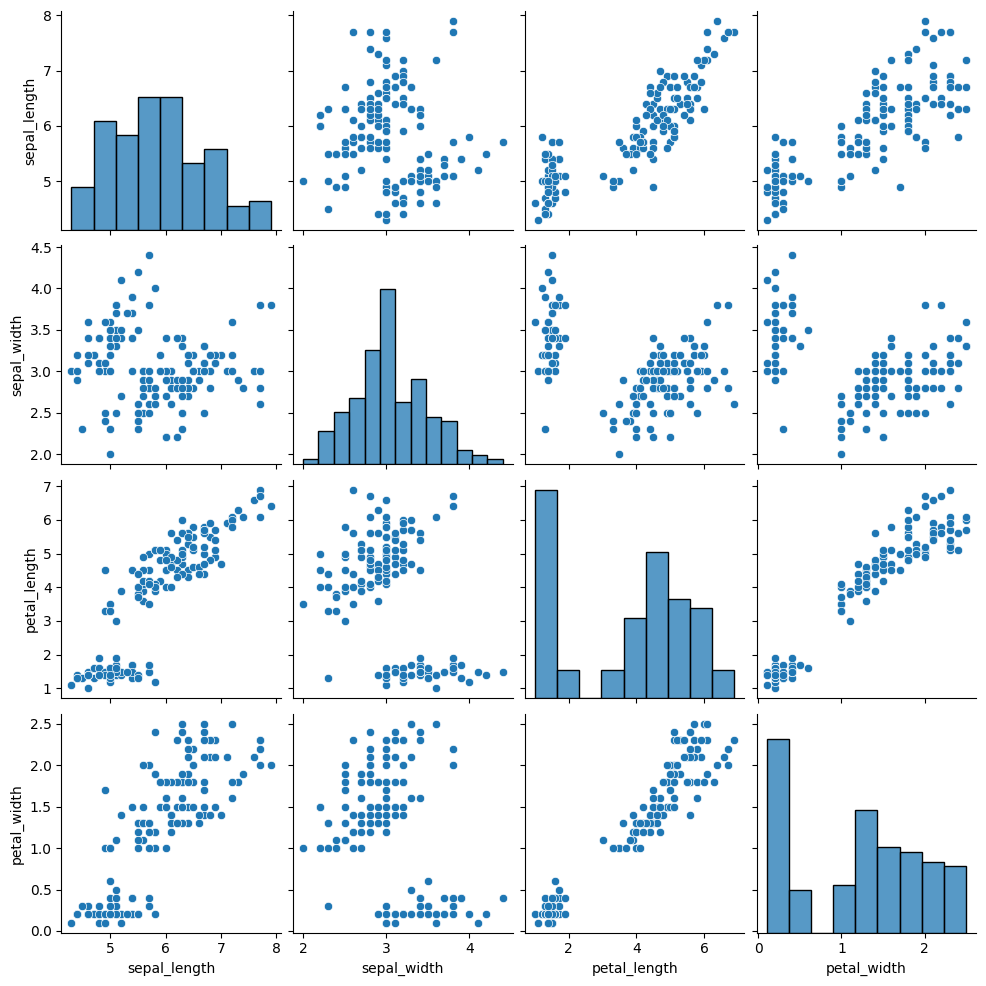

In [60]:
sb.pairplot(iris)

In [61]:
flights_piv

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


<Axes: xlabel='month', ylabel='year'>

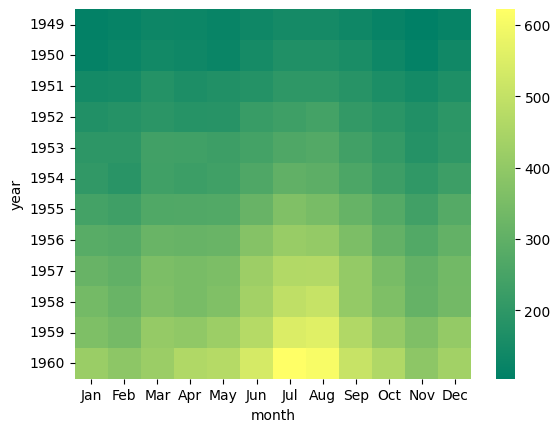

In [63]:
sb.heatmap(flights_piv, cmap='summer')